# [Pokemon with Stats](https://www.kaggle.com/abcsds/pokemon) 

## Importing Dataset 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [3]:
pokemon = pd.read_csv('Pokemon.csv')

Glimpse of Pokemon Datasets

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Summary 

In [109]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Structure

In [111]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Generations 

How many Pokémon are there per generation?

In [5]:
total_pokemon = pokemon.groupby('Generation').count()['Type 1']

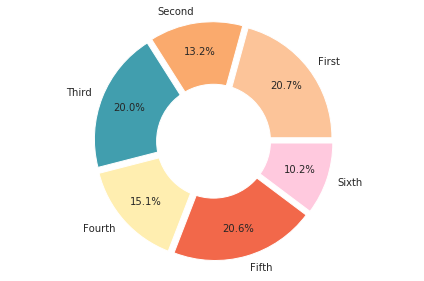

In [6]:
labels = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth']
colors = ['#FCC499','#FAAA6D','#419EAE','#FFEEB0','#F2684A','#FFC9DE']
explode = (0.05,0.05,0.05,0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(total_pokemon, labels = labels, explode = explode, colors = colors, autopct = '%1.1f%%', pctdistance = 0.75)
ax1.axis('equal')  

centre_circle = plt.Circle((0 ,0), 0.50, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

The most number of Pokémon are from the first generation. Can we specify how many Pokémon of each primary type are there per generation? 

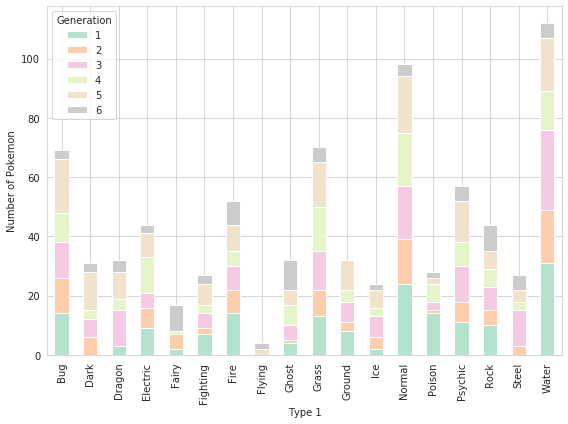

In [95]:
pokemon_primary_generation = pokemon.groupby(['Generation', 'Type 1']).size().reset_index().pivot(columns = 'Generation', index = 'Type 1', values = 0)
pokemon_primary_generation.plot(kind = 'bar', stacked = True, figsize = (8, 6), colormap = 'Pastel2')

plt.ylabel('Number of Pokemon')

plt.tight_layout()

## Legendary 

How many Legendary Pokémon are there in relation to all of the Pokémon in our data set?

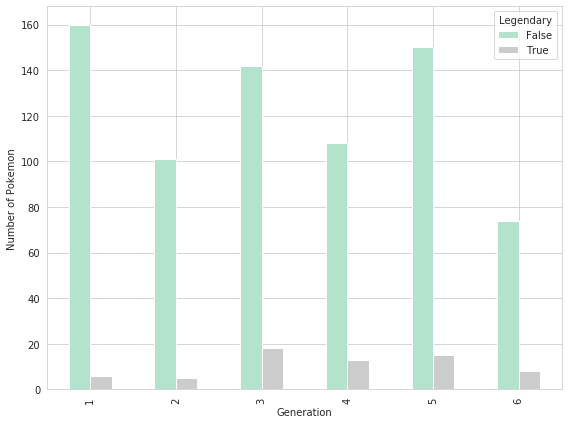

In [98]:
pokemon_legendary = pokemon.groupby(['Generation', 'Legendary']).size().reset_index().pivot(columns = 'Legendary', index = 'Generation', values = 0)
pokemon_legendary.plot(kind = 'bar',figsize = (8, 6), colormap = 'Pastel2')

plt.ylabel('Number of Pokemon')
plt.tight_layout()

## Types of Pokémon

First let’s see the different types of Pokémon.

In [103]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [105]:
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Number of Pokémon of each primary type per generation

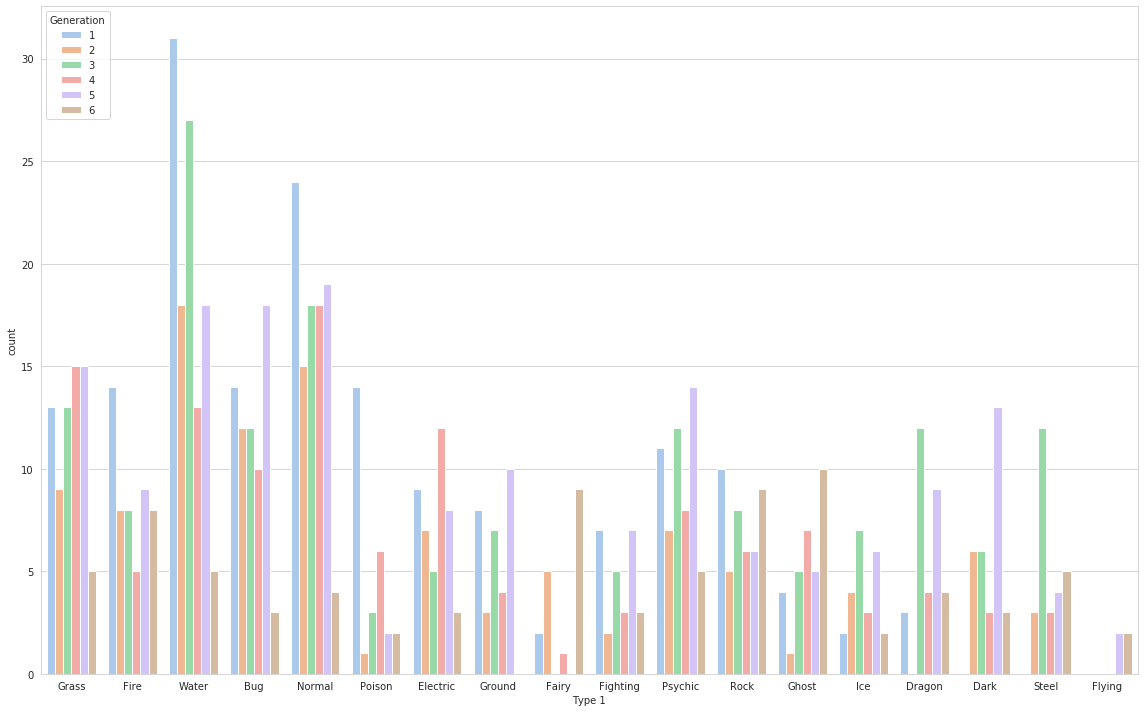

In [106]:
plt.figure(figsize = (16, 10))
sns.countplot(x = 'Type 1', data = pokemon, hue = 'Generation', palette = 'pastel')
plt.tight_layout()

Number of Pokémon of each secondary type per generation

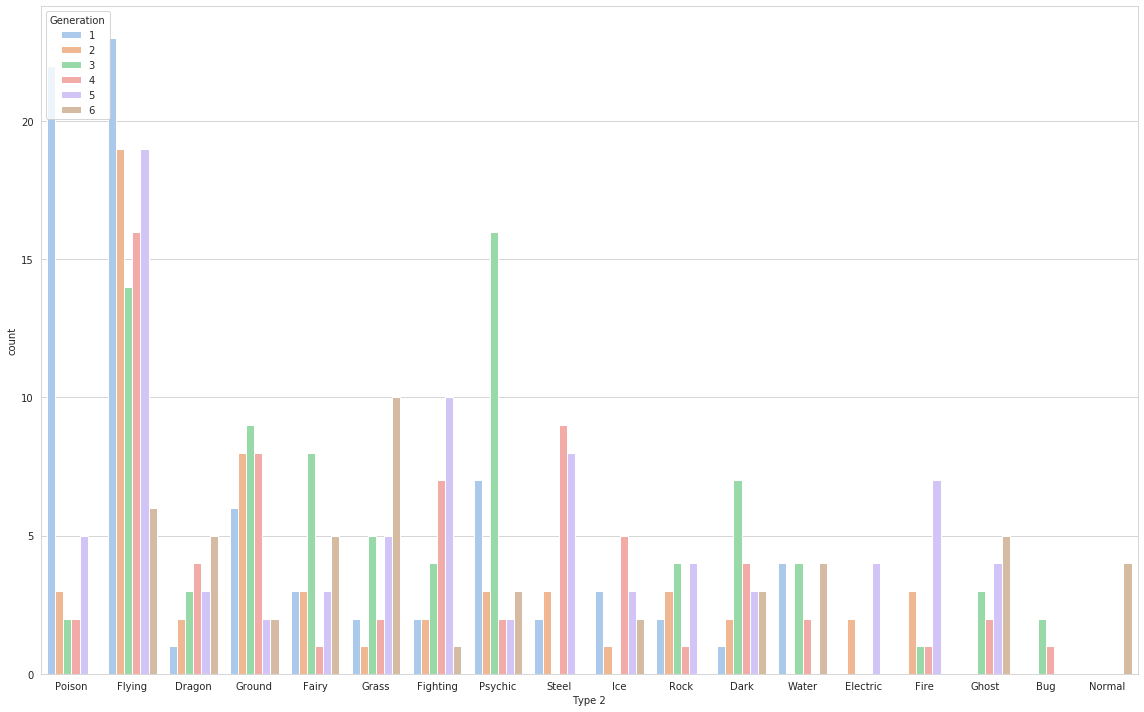

In [10]:
plt.figure(figsize = (16, 10))
sns.countplot(x = 'Type 2',  data = pokemon, hue = 'Generation', palette = 'pastel')
plt.tight_layout()

Pokémon that doesn't have secondary type from all generation

In [11]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
pokemon[pokemon['Type 2'].isna()].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


Change the value from NaN into None 

In [13]:
pokemon_without_secondary_type = pokemon

In [14]:
pokemon_without_secondary_type = pokemon_without_secondary_type['Type 2'].fillna('None')

In [15]:
pokemon_without_secondary_type.head()

0    Poison
1    Poison
2    Poison
3    Poison
4      None
Name: Type 2, dtype: object

Number of Pokémon of each none secondary type per generation

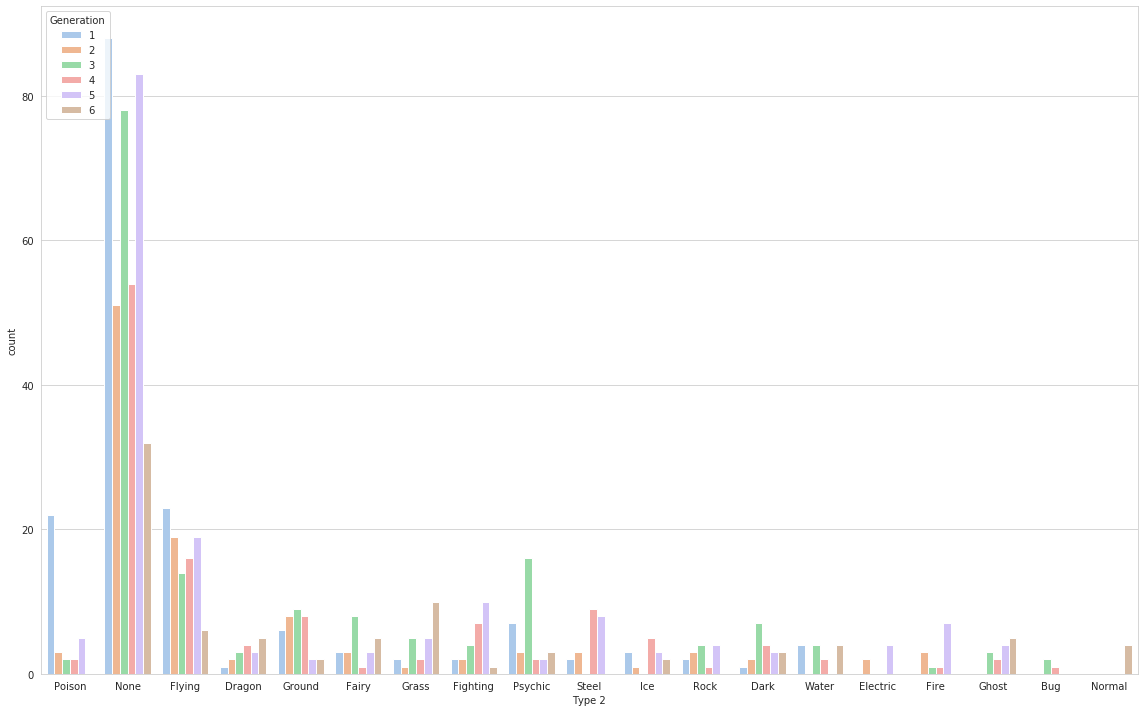

In [16]:
plt.figure(figsize = (16, 10))
sns.countplot(x = pokemon_without_secondary_type, hue = pokemon['Generation'], palette = 'pastel')
plt.tight_layout()

Number of Pokémon for each type combination 

In [17]:
pokemon_type = pokemon.groupby(['Type 2', 'Type 1']).count()['Generation'].unstack()

In [18]:
pokemon_type.head()

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 2,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
Dark,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,3.0,3.0,NaN,NaN,3.0,1.0,2.0,NaN,6.0
Dragon,NaN,3.0,NaN,1.0,NaN,NaN,1.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,1.0,2.0
Electric,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Fairy,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,5.0,NaN,6.0,3.0,3.0,2.0


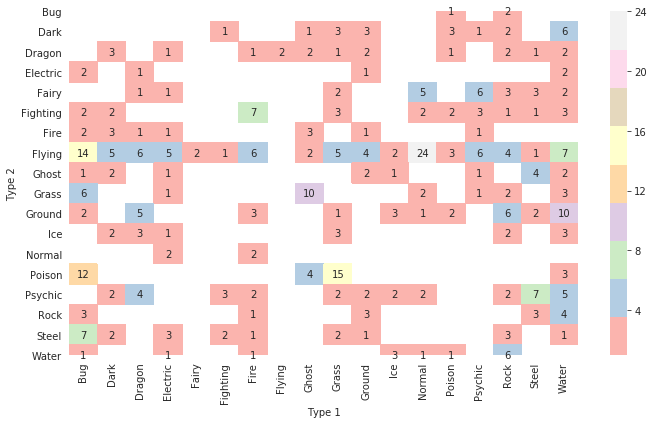

In [19]:
plt.figure(figsize = (10, 6))
sns.heatmap(pokemon_type, annot = True, cmap = 'Pastel1')
plt.tight_layout()

## Stats 

Let’s start with some simple histograms to represent the distribution of the following stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

Text(0, 0.5, 'Frequency')

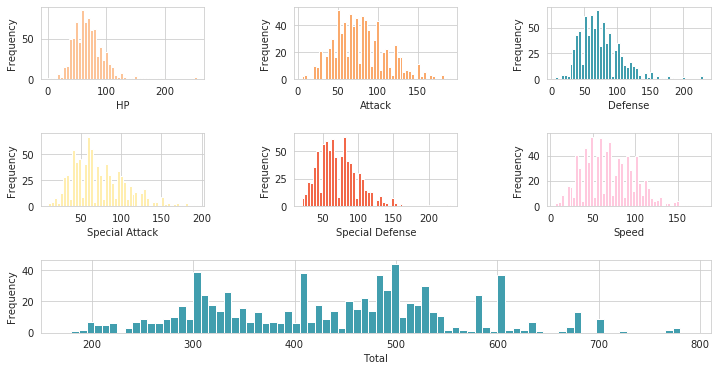

In [20]:
fig = plt.figure(figsize=(12, 6))

grid = plt.GridSpec(3, 3, wspace=0.55, hspace=0.75)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])
ax4 = plt.subplot(grid[1, 0])
ax5 = plt.subplot(grid[1, 1])
ax6 = plt.subplot(grid[1, 2])
ax7 = plt.subplot(grid[2, :3])

ax1.hist(pokemon['HP'], 50, color = colors[0])
ax1.set_xlabel('HP')
ax1.set_ylabel('Frequency')

ax2.hist(pokemon['Attack'], 50, color = colors[1])
ax2.set_xlabel('Attack')
ax2.set_ylabel('Frequency')

ax3.hist(pokemon['Defense'], 50, color = colors[2])
ax3.set_xlabel('Defense')
ax3.set_ylabel('Frequency')

ax4.hist(pokemon['Sp. Atk'], 50, color = colors[3])
ax4.set_xlabel('Special Attack')
ax4.set_ylabel('Frequency')

ax5.hist(pokemon['Sp. Def'], 50, color = colors[4])
ax5.set_xlabel('Special Defense')
ax5.set_ylabel('Frequency')

ax6.hist(pokemon['Speed'], 50, color = colors[5]) 
ax6.set_xlabel('Speed')
ax6.set_ylabel('Frequency')

ax7.hist(pokemon['Total'], 80, color = colors[2])
ax7.set_xlabel('Total')
ax7.set_ylabel('Frequency')

Are the Legendary Pokémon much better than the normal ones? We can compare the density plots to see the difference between their stats.

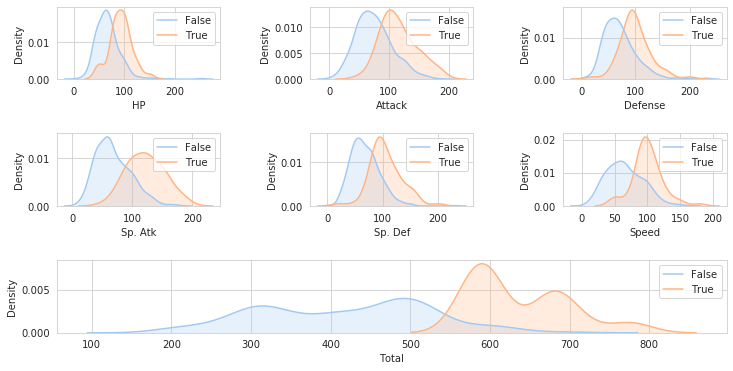

In [108]:
fig = plt.figure(figsize=(12, 6))

grid = plt.GridSpec(3, 3, wspace=0.55, hspace=0.75)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])
ax4 = plt.subplot(grid[1, 0])
ax5 = plt.subplot(grid[1, 1])
ax6 = plt.subplot(grid[1, 2])
ax7 = plt.subplot(grid[2, :3])

g = sns.FacetGrid(pokemon, hue = 'Legendary')

g.set(xmargin=0.05, ymargin=0.15)

g.map(sns.distplot, 'HP', hist = False, kde_kws = {'shade' : True}, ax = ax1);
ax1.set_ylabel('Density')

g.map(sns.distplot, 'Attack', hist = False, kde_kws = {'shade' : True}, ax = ax2)
ax2.set_ylabel('Density')

g.map(sns.distplot, 'Defense', hist = False, kde_kws = {'shade' : True}, ax = ax3)
ax3.set_ylabel('Density')

g.map(sns.distplot, 'Sp. Atk', hist = False, kde_kws = {'shade' : True}, ax = ax4)
ax4.set_ylabel('Density')

g.map(sns.distplot, 'Sp. Def', hist = False, kde_kws = {'shade' : True}, ax = ax5)
ax5.set_ylabel('Density')

g.map(sns.distplot, 'Speed', hist = False, kde_kws = {'shade' : True}, ax = ax6)
ax6.set_ylabel('Density')

g.map(sns.distplot, 'Total', hist = False, kde_kws = {'shade' : True}, ax = ax7)
ax7.set_ylabel('Density')

plt.close()

It is clear that Legendary Pokémon have greater statistics. What about the boxplots? It may be interesting to see the statistical distribution according to the Pokémon’s type.

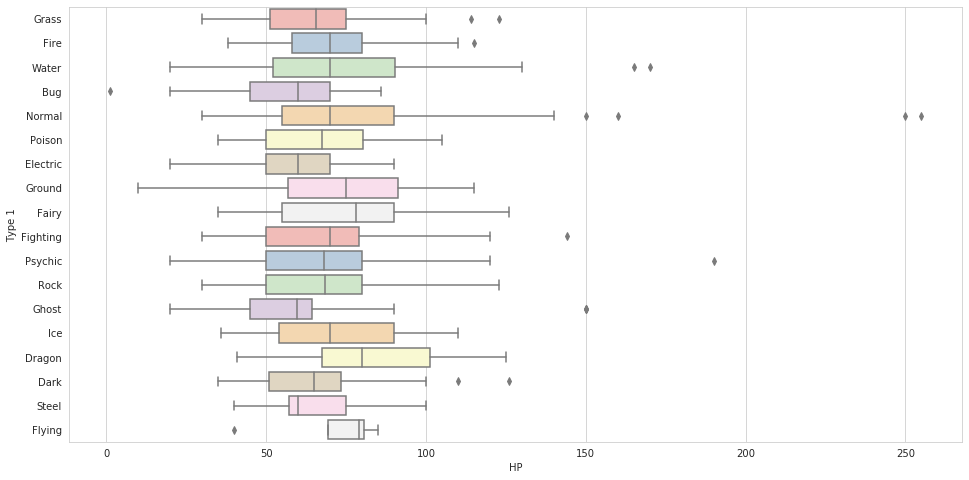

In [64]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'HP', y = 'Type 1', data = pokemon, palette = 'Pastel1')

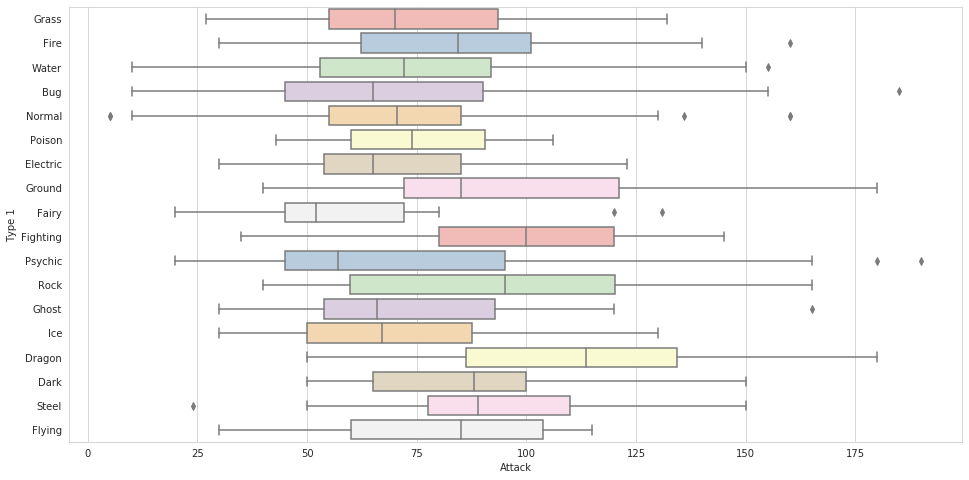

In [65]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Attack', y = 'Type 1', data = pokemon, palette = 'Pastel1')

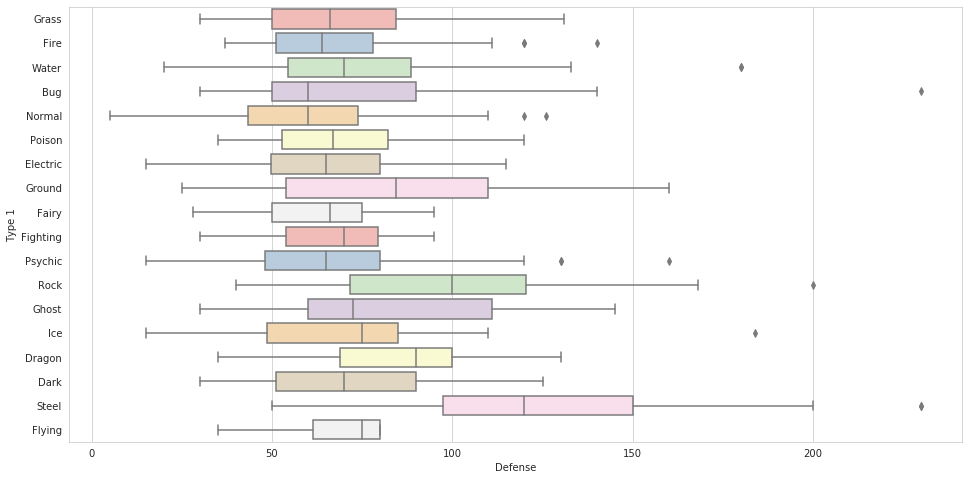

In [67]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Defense', y = 'Type 1', data = pokemon, palette = 'Pastel1')

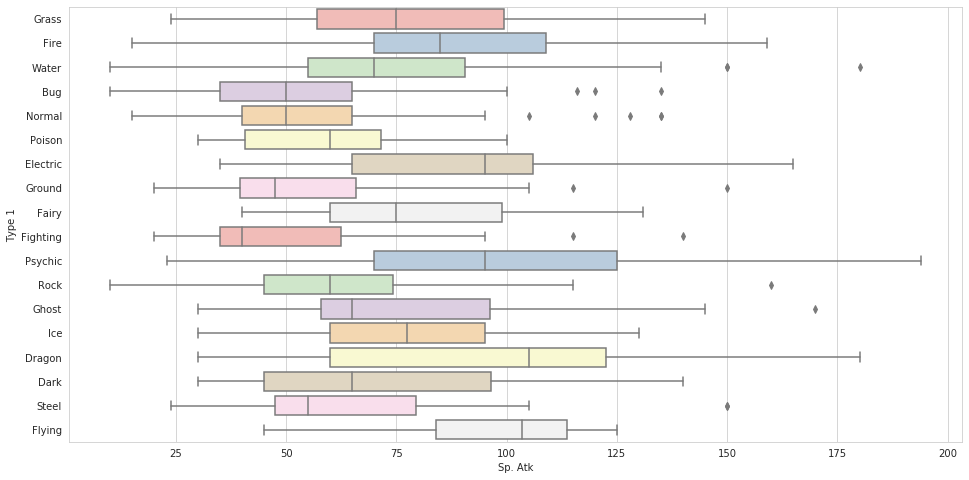

In [68]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Sp. Atk', y = 'Type 1', data = pokemon, palette = 'Pastel1')

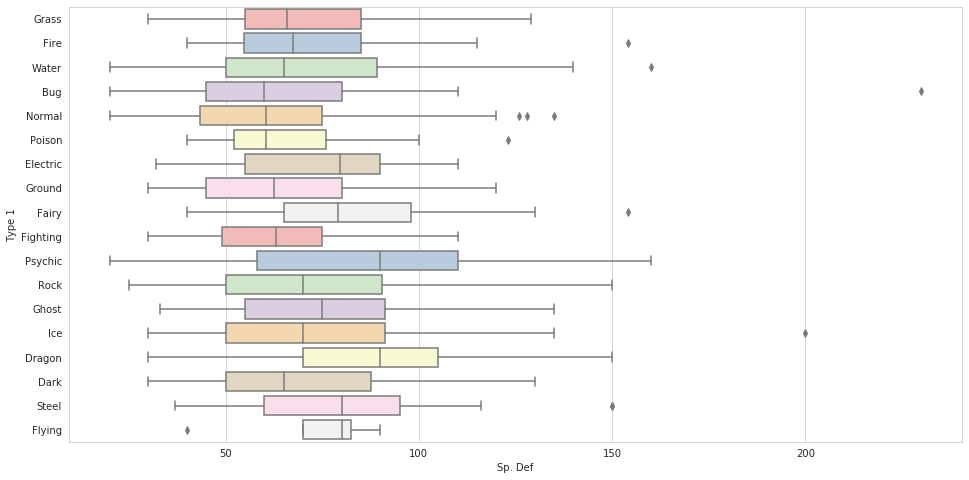

In [69]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Sp. Def', y = 'Type 1', data = pokemon, palette = 'Pastel1')

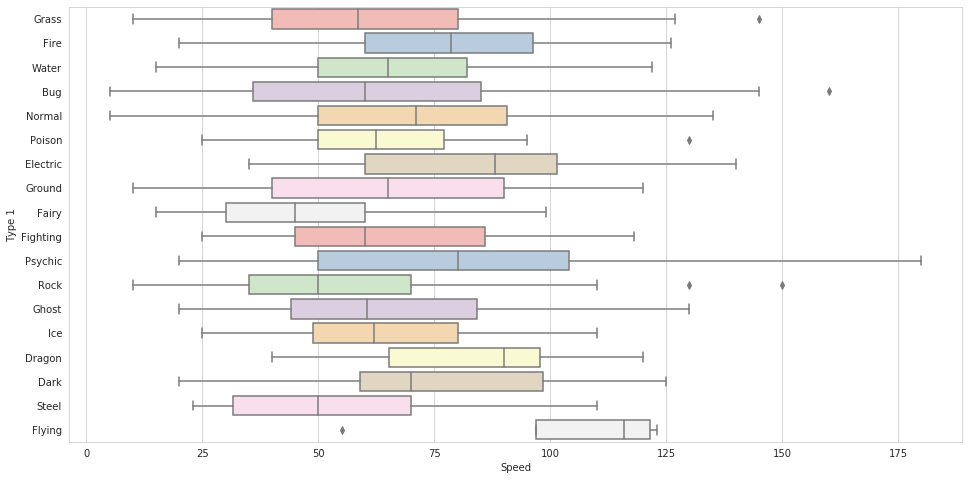

In [70]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Speed', y = 'Type 1', data = pokemon, palette = 'Pastel1')

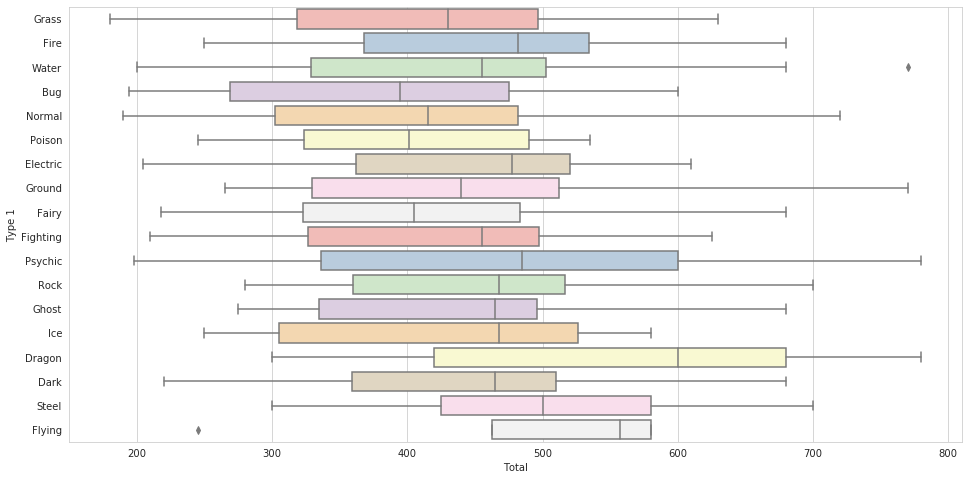

In [71]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Total', y = 'Type 1', data = pokemon, palette = 'Pastel1')

The outliers in the boxplots correspond to Pokémon (normally Legendary or Mega Evolutions) with impressive stats numerically distants from the rest of the data. For example, Regirock is an outlier in the defense boxplot (200 points in defense!).

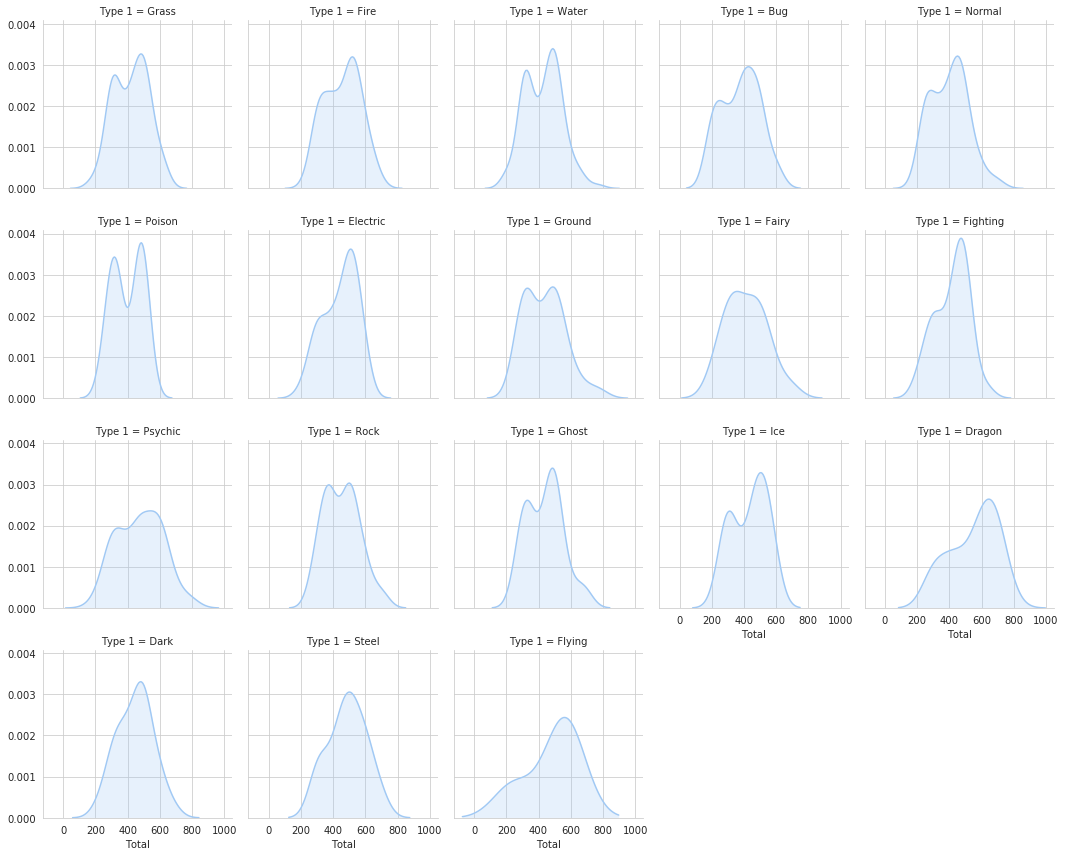

In [88]:
g = sns.FacetGrid(pokemon, col = 'Type 1', col_wrap = 5)
g.map(sns.distplot, 'Total', hist = False, kde_kws = {'shade' : True})

Analyzing the boxplots and the density plots, we can say that the Dragon-type Pokémon are statistically superior from the rest. Another question to answer: In which generation the stats are better?

In [30]:
pokemon_generation = pokemon.groupby('Generation').mean()['Total']

Text(0, 0.5, 'Average Total')

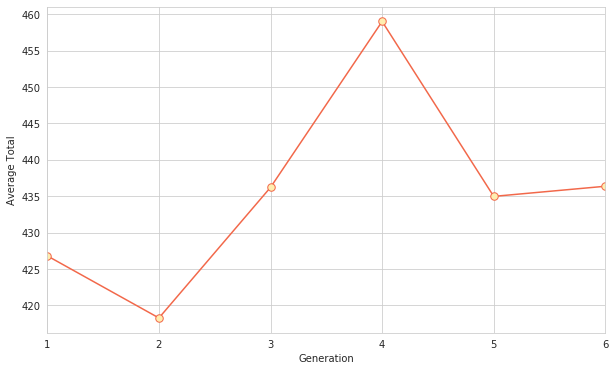

In [31]:
plt.figure(figsize = (10, 6))

pokemon_generation.plot(marker = '.', markersize = 15, mfc = colors[3], color = colors[4])

plt.ylabel('Average Total')

The fourth generation has the best average stats, probably because it is the generation with more Legendary Pokémon. What happens if we split up the Total stat?

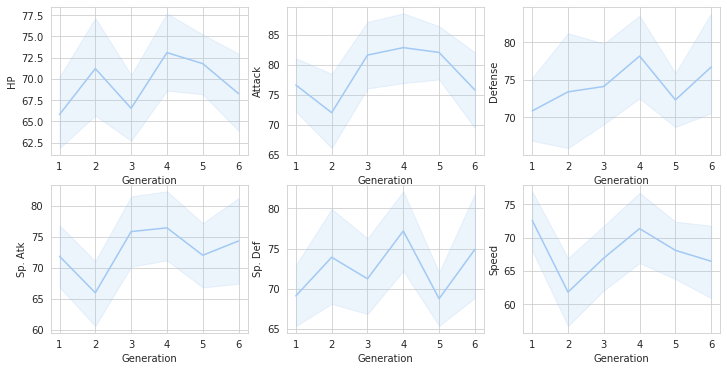

In [91]:
fig = plt.figure(figsize  = (12, 6))

grid = plt.GridSpec(2, 3)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])
ax4 = plt.subplot(grid[1, 0])
ax5 = plt.subplot(grid[1, 1])
ax6 = plt.subplot(grid[1, 2])


sns.lineplot(pokemon['Generation'], pokemon['HP'], ax = ax1)
sns.lineplot(pokemon['Generation'], pokemon['Attack'], ax = ax2)
sns.lineplot(pokemon['Generation'], pokemon['Defense'], ax = ax3)
sns.lineplot(pokemon['Generation'], pokemon['Sp. Atk'], ax = ax4)
sns.lineplot(pokemon['Generation'], pokemon['Sp. Def'], ax = ax5)
sns.lineplot(pokemon['Generation'], pokemon['Speed'], ax = ax6)

The Strongest Pokemon based on Total Column

In [33]:
pokemon[pokemon['Total'] == pokemon['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


The Weakest Pokemon based on Total column 

In [34]:
pokemon[pokemon['Total'] == pokemon['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


Top 10 HP Pokemon

In [35]:
pokemon_hp = pokemon.sort_values('HP', axis = 0, ascending = False).head(10)

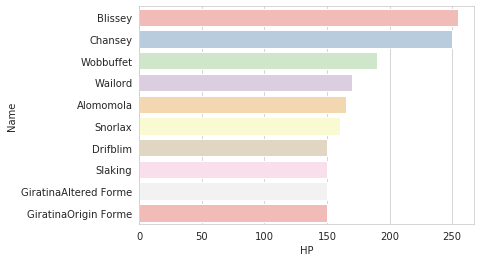

In [36]:
sns.barplot(x = 'HP', y = 'Name', data = pokemon_hp, palette = 'Pastel1')

Top 10 Attack Pokemon 

In [37]:
pokemon_attack = pokemon.sort_values('Attack', axis = 0, ascending = False).head(10)

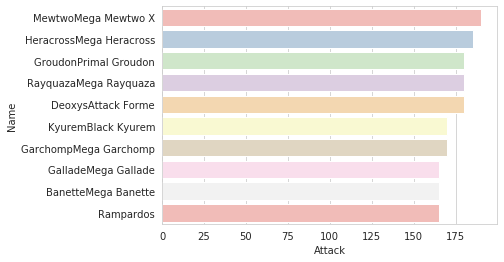

In [38]:
sns.barplot(x = 'Attack', y = 'Name', data = pokemon_attack, palette = 'Pastel1')

Top 10 Defense Pokemon

In [39]:
pokemon_defense = pokemon.sort_values('Defense', ascending = False).head(10)

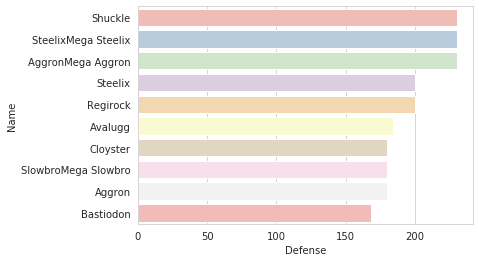

In [40]:
sns.barplot(x = 'Defense', y = 'Name', data = pokemon_defense, palette = 'Pastel1')

Top 10 Speed Pokemon

In [41]:
pokemon_speed = pokemon.sort_values('Speed', ascending = False).head(10)

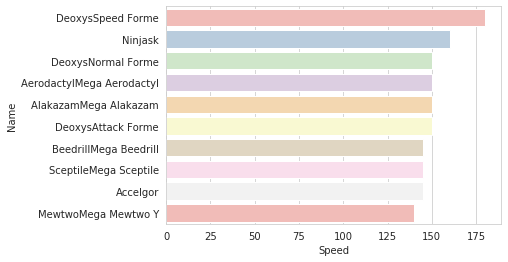

In [42]:
sns.barplot(x = 'Speed', y = 'Name', data = pokemon_speed, palette = 'Pastel1')

Top 10 Special Attack Pokemon 

In [43]:
pokemon_atk_special = pokemon.sort_values('Sp. Atk', ascending = False).head(10)

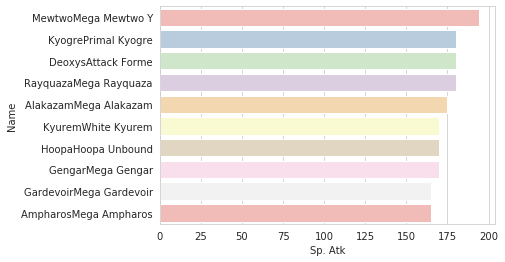

In [44]:
sns.barplot(x = 'Sp. Atk', y = 'Name', data = pokemon_atk_special, palette = 'Pastel1')

Top 10 Special Defense Pokemon 

In [45]:
pokemon_def_special = pokemon.sort_values('Sp. Def', ascending = False).head(10)

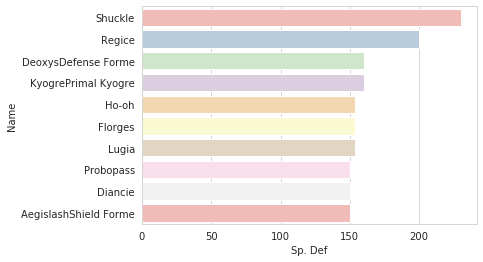

In [46]:
sns.barplot(x = 'Sp. Def', y = 'Name', data = pokemon_def_special, palette = 'Pastel1')

Top 10 Overall Pokemon 

In [47]:
pokemon_overall = pokemon.sort_values('Total', ascending = False).head(10)

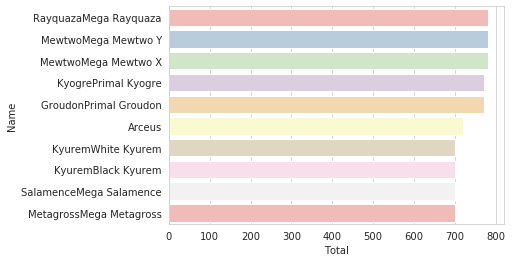

In [48]:
sns.barplot(x = 'Total', y = 'Name', data = pokemon_overall, palette = 'Pastel1')